# Logistic Regression

## Hi!
In today's workshop we are going to learn about most known concept of supervised learning which is **classification**.

### What is classification?
Classification is a problem of predicting discrete value (classes) for given features. It is mainly viewed as a supervised learning problem.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from ipywidgets import interact, fixed
import ipywidgets as widgets

import solutions

%load_ext autoreload
%autoreload 2

Just like last time, we'll work with a very real-world dataset describing a couple hundred cases of breast cancer, which presents an example of a case for **binary classification**

In [2]:
print(load_breast_cancer().DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

First, we'll split our data int train, test, and validation datasets

In [3]:
X, y = load_breast_cancer(return_X_y=True)

In [4]:
np.random.seed(0)
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, train_size=0.7)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, train_size=0.66)

/home/kacper/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [5]:
X_train.shape, y_train.shape

((398, 30), (398,))

In [6]:
X_val.shape, y_val.shape

((112, 30), (112,))

In [7]:
X_test.shape, y_test.shape

((59, 30), (59,))

### What about applying linear regression for classification?

Let's take a look at the target data:

In [8]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

It's a bunch of ones and zeros! Wouldn't it make sense to just train a linear regressor on the data?

In [9]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [10]:
X_train[0]

array([1.149e+01, 1.459e+01, 7.399e+01, 4.049e+02, 1.046e-01, 8.228e-02,
       5.308e-02, 1.969e-02, 1.779e-01, 6.574e-02, 2.034e-01, 1.166e+00,
       1.567e+00, 1.434e+01, 4.957e-03, 2.114e-02, 4.156e-02, 8.038e-03,
       1.843e-02, 3.614e-03, 1.240e+01, 2.190e+01, 8.204e+01, 4.676e+02,
       1.352e-01, 2.010e-01, 2.596e-01, 7.431e-02, 2.941e-01, 9.180e-02])

In [11]:
linear_reg.predict(X_val)

array([ 0.84998133,  0.22048285,  0.3941945 ,  0.86375817, -0.16626932,
       -0.01729324,  0.35843987, -0.04400875,  0.70965109,  0.97355174,
        1.07483318,  0.79430627,  1.13981164,  0.8141873 ,  1.09722388,
        1.12610922,  0.49338782,  0.03629234,  0.72910668, -0.21499951,
        0.89800084,  1.2533906 ,  0.99187677, -0.02198971,  0.80222119,
        0.65447029,  0.60567631,  1.06239166,  0.32102958,  0.99738389,
        0.99115109,  1.00180034,  0.02839095,  0.95612818,  1.03437722,
        0.73331178,  1.15704368,  0.03085382,  0.1667618 ,  0.75913895,
        0.75522409,  1.34877262,  1.29633559,  0.66951523,  0.66632104,
        1.27354914,  0.02001526,  0.57055434,  1.05315389,  1.36245457,
        0.91234652,  0.92046487,  0.97540301,  1.14241766,  0.70211554,
        0.10320654,  0.41607532, -0.19903041,  0.92058183, -0.03571308,
        0.8443541 ,  0.7200238 ,  0.42169619,  0.01594877,  0.80617575,
        0.23465956,  0.81148532,  0.8923627 ,  1.01646111,  0.10

How to interpret these predictions? Maybe we need something different?

![classification_regression](img/clas_reg.png)

### What is logistic regression?

Logistic regression is about applying a "squashing" function to the hypotheses when calculating loss.

### $$h_w(x) = \sum_{j=0}^k w_j x_j = wx$$

### $$\hat{y} = \sigma(h_w(x))$$ 

### One of such squashing functions is sigmoid function:
### $$\sigma(x) = \frac{1}{1+e^{-x}}$$

In [12]:
x = np.linspace(-10, 10)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

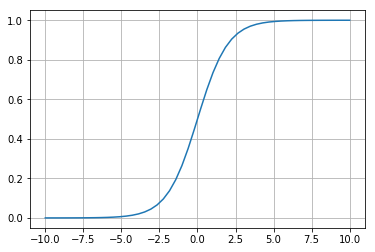

In [13]:
plt.plot(x, sigmoid(x))
plt.grid(True)
plt.show()

In [14]:
sigmoid(np.inf), sigmoid(-np.inf)

(1.0, 0.0)

### Because of non-linearities in our hypotheses, we also need to update our loss function.

We'll use a logarythmic loss function which quite nicely captures an intuition, that we want the predictions datapoins which should be predicted as $0$ as close to $0$ as possible, and, analogically, predictions which should be $1$, as close to $1$ as possible:

### $$ L(w) = \frac{-1}{n}(\sum_{i=0}^n y^{(i)}\log{h_w(x^{(i)})} + (1-y^{(i)})\log{(1-h_w(x^{(i)}))} )$$

### $$ y^{(i)} \in \{0, 1\}$$

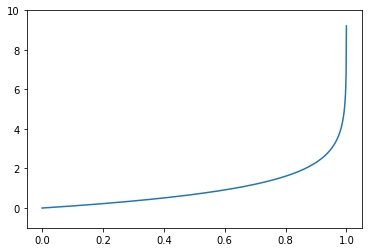

In [15]:
# y = 0
x = np.linspace(0, 0.9999, 1000)
plt.plot(x, -np.log(1 - x))
plt.ylim(-1, 10)
plt.show()

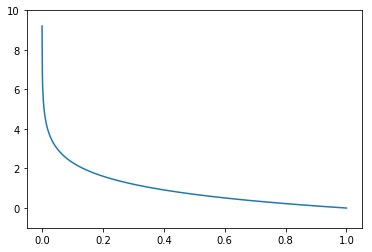

In [16]:
# y = 1
x = np.linspace(0.0001, 1, 1000)
plt.plot(x, -np.log(x))
plt.ylim(-1, 10)
plt.show()

Let's try and implement this new loss function!

In [17]:
y.shape
W = np.random.rand(X.shape[1])
X.shape

(569, 30)

In [19]:
def loss(
    W: np.ndarray, 
    X: np.ndarray, 
    Y: np.ndarray, 
    eps: float = 0.01 # the epsilon parameter is for numeric stability of logarithm
) -> float:
    h_w = np.apply_along_axis(lambda x: np.dot(x, W), 1, X)
    activation = sigmoid(h_w)
    vectors_sum = Y*np.log(activation+eps) + (1-Y)*np.log(1-activation+eps)
    loss = -vectors_sum.mean()
    
    return loss

In [ ]:
loss = solutions.loss

In [20]:
W = np.random.rand(X.shape[1])
print(loss(W, X, y, eps=0.1))
print(solutions.loss(W, X, y, eps=0.1))

0.7981059851047339
0.7981059851047339


What about gradient descent procedure? How does it change? Let's derive the gradient!

[we'll do that on the board] 
It turns out, it's very simple!

### $$
\frac{\partial L(W)}{\partial W} =\frac{1}{n}(\sum_{i=0}^n x^{(i)} \cdot (h_w(x^{(i)}) - y^{(i)}))
$$

In [21]:
def gradient_step(
    W, 
    X, 
    Y,
    learning_rate=0.01
) -> np.ndarray:
    W_old = W
    h_w = np.apply_along_axis(lambda x: np.dot(x, W), 1, X)
    activation = sigmoid(h_w)
#     matrix_sum = X * (activation-Y).reshape(-1,1)
    errors = activation - Y
    gradient = (X.T.dot(errors)) / len(errors)
    W_new = W_old - gradient*learning_rate
    return W_new

In [ ]:
gradient_step = solutions.gradient_step

In [22]:
W = np.random.rand(X.shape[1])

yours = gradient_step(W, X, y, learning_rate=0.1)
provided = solutions.gradient_step(W, X, y, learning_rate=0.1)
print(yours - provided)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


Let's not forget about adding the bias feature and normalizing the data!

In [23]:
def add_bias_feature(X):
       return np.c_[np.ones(len(X)), X]

In [24]:
X_train = add_bias_feature(X_train)
X_val = add_bias_feature(X_val)
X_test = add_bias_feature(X_test)

In [26]:
X_train, *norm_parameters = solutions.std_normalization(X_train)
X_val, *_ = solutions.std_normalization(X_val, *norm_parameters)
X_test, *_ = solutions.std_normalization(X_test, *norm_parameters)

In [27]:
np.random.seed(0)
W = np.random.randn(X_train.shape[1])
train_costs = []
val_costs = []
train_steps = 100
for _ in range(train_steps):
    train_costs.append(loss(W, X_train, y_train, eps=0.001))
    val_costs.append(loss(W, X_val, y_val, eps=0.001))
    W = gradient_step(W, X_train, y_train, learning_rate=0.1)
   

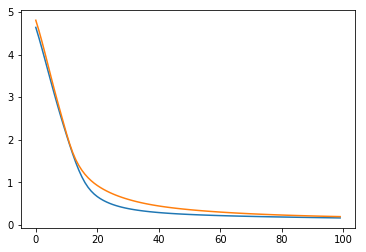

In [28]:
plt.plot(np.arange(train_steps), train_costs)
plt.plot(np.arange(train_steps), val_costs)
plt.show()

In [29]:
accuracy_score(y_train, solutions._hypotheses(W, X_train) >= 0.5)

0.9472361809045227

In [30]:
accuracy_score(y_val, solutions._hypotheses(W, X_val) >= 0.5)

0.9285714285714286

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
logistic_reg = LogisticRegression(C=10**6)

In [33]:
logistic_reg.fit(X_train, y_train)

LogisticRegression(C=1000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [34]:
logistic_reg.score(X_train, y_train)

1.0

In [35]:
logistic_reg.score(X_val, y_val)

0.9375

### A great score! Or is it?

In [36]:
positive_ind = np.argwhere(y_val == 1).reshape(-1)
negative_ind = np.argwhere(y_val == 0).reshape(-1)
X_val_pos = X_val[positive_ind]
y_val_pos = y_val[positive_ind]
X_val_neg = X_val[negative_ind]
y_val_neg = y_val[negative_ind]

In [37]:
accuracy_score(y_val_pos, solutions._hypotheses(W, X_val_pos) >= 0.5)

0.9863013698630136

In [38]:
accuracy_score(y_val_neg, solutions._hypotheses(W, X_val_neg) >= 0.5)

0.8205128205128205

We achieve higher accuracies on positive examples, than on negative ones. In practice, this means we're likelier to classify tumors as malignant than not. 

Better safe than sorry? Turns out, not always. Can we dig deeper into the performance of our model?

### Precision and recall
We can divide classifications of our model into four classes:

| Predicted/Actual | 0   | 1   |
|------------------|-----|-----|
| 0                | True negative | False negative|
| 1                | False positive | True positive | 


**Accuracy - a first intuition**

$$
Accuracy = \frac{T_p + T_n}{T_n + T_p + F_n + F_p}
$$

However, as we've just seen, this metric may be deceiving (consider class imbalance!)

Turns out there is a more reliable way to measure the performance of our model:

- **Precision** - *what fraction of our positive classifications is correct?*
$$
Precision = \frac{T_p}{T_p + F_p}
$$

- **Recall** - *what fraction of actual positive examples has been classified correctly?*
$$
Recall = \frac{T_p}{T_p + F_n}
$$

We want both of those values to be as high as possible (duh).

However, sometimes we have to make a trade off between them and decide with our classification method that one will be higher and the other lower.

A metric which nicely mixes the two above is called the **F1 score** - it's high when both precision and recall are high enough, but low when one of them is sacrificed for the sake of another.

$$
F1 = \frac{2PR}{P +R}
$$

#### Can precision and recall be manipulated without tinkering with the model?

In [39]:
def calc_precision_recall(
    X: np.ndarray,
    y: np.ndarray,
    W: np.ndarray,
    threshold: float
):
    y_pred = solutions._hypotheses(W, X)
    y_pred_bin = y_pred >= threshold
    print('precision', precision_score(y, y_pred_bin))
    print('recall', recall_score(y, y_pred_bin))
    print('F1 score', f1_score(y, y_pred_bin))
    positive_ind = np.argwhere(y == 1).reshape(-1)
    negative_ind = np.argwhere(y == 0).reshape(-1)
    y_pos = y[positive_ind]
    y_neg = y[negative_ind]
    y_pos_pred = y_pred_bin[positive_ind]
    y_neg_pred = y_pred_bin[negative_ind]
    print('total accuracy', accuracy_score(y, y_pred_bin))
    print('positive accuracy', accuracy_score(y_pos, y_pos_pred))
    print('negative accuracy', accuracy_score(y_neg, y_neg_pred))

In [40]:
interact(
    calc_precision_recall,
    X=fixed(X_val),
    y=fixed(y_val),
    W=fixed(W),
    threshold=widgets.FloatSlider(
        value=0.5,
        min=0,
        max=1,
        step=0.01
    )
)

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_classes=('widget-interact',))

<function __main__.calc_precision_recall>

#### How does F1 score depend on the threshhold?

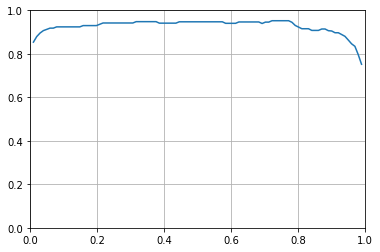

In [41]:
thresholds = np.linspace(.01, .99, 100)
scores = []

for t in thresholds:
    y_pred = solutions._hypotheses(W, X_val)
    y_pred_bin = y_pred >= t
    scores.append(f1_score(y_val, y_pred_bin))
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.plot(thresholds, scores)


#### To better visualize how precision recall depend on each other, we can also plot an AUROC curve

**A**rea

**U**nder

**R**eceiver

**O**perating

**C**haracteristic

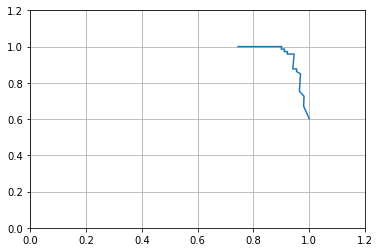

In [42]:
thresholds = np.linspace(.01, .99, 100)
precisions = []
recalls = []

for t in thresholds:
    y_pred = solutions._hypotheses(W, X_val)
    y_pred_bin = y_pred >= t
    precisions.append(precision_score(y_val, y_pred_bin))
    recalls.append(recall_score(y_val, y_pred_bin))
plt.xlim(0, 1.2)
plt.ylim(0, 1.2)
plt.grid(True)
plt.plot(precisions, recalls)